# **Twitter Sentiment Analysis**
**Analysis of tweet sentiment about artificial intelligence using Python, Pandas, and NLP.**

In [ ]:
import pandas as pd
df = pd.read_csv('ai_tweet.csv')



FileNotFoundError: [Errno 2] No such file or directory: 'ai_tweet.csv'

# **First : Exploratory Data Analysis**


Understand the number of rows and columns

Display data samples

Detect null values ​​or duplicates

In [ ]:
# Display the first 5 rows of data
df.head()

NameError: name 'df' is not defined

In [ ]:
df.shape  # Number of rows and columns

(5002, 6)

In [ ]:
# Column names
df.columns

Index(['Unnamed: 0', 'date', 'username', 'location', 'tweets', 'likes'], dtype='object')

In [ ]:
#Comprehensive information about data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002 entries, 0 to 5001
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5002 non-null   int64 
 1   date        5002 non-null   object
 2   username    5002 non-null   object
 3   location    3554 non-null   object
 4   tweets      5002 non-null   object
 5   likes       5002 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 234.6+ KB


In [ ]:
# Are there any missing values?
df.isnull().sum()

,0
Unnamed: 0,0
date,0
username,0
location,1448
tweets,0
likes,0


In [ ]:
# Are there duplicate tweets?
df.duplicated().sum()

np.int64(0)

In [ ]:
# Delete columns we don't want
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['location'], inplace=True)


# **Text Preprocessing**

## Step 1: Import the tools

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


These tools allow us to delete common words like (the, is, you), etc.

## Step 2: Text Cleanup Function



In [ ]:
# Identify common words in English
stop_words = set(stopwords.words('english'))

# Cleaning function
def clean_text(text):
    text = str(text).lower()  # Convert to lower case
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove links
    text = re.sub(r'@\w+', '', text)  # Remove usernames
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove icons and tags
    text = re.sub(r'\s+', ' ', text)  # Remove duplicate spaces
    text = ' '.join(word for word in text.split() if word not in stop_words)  # حذف الكلمات الشائعة
    return text.strip()


## Step 3: Apply the function to the tweets column

In [ ]:
df['clean_text'] = df['tweets'].apply(clean_text)

# عرض عينة للمقارنة
df[['tweets', 'clean_text']].head()


,tweets,clean_text
0,#sunset #cityskyline #beautiful #artificialint...,sunset cityskyline beautiful artificialintelli...
1,Behind every generative #AI masterpiece is a m...,behind every generative ai masterpiece machine...
2,The Internet is flooded with artworks created ...,internet flooded artworks created generative a...
3,"LISTEN ON FRIDAYS TO EPIC PROJECT ""ARTIFICIAL ...",listen fridays epic project artificial intelli...
4,From Clothes to Spaceships: @Amazon 's Bedrock...,clothes spaceships bedrock ai create anything ...


 This gives us a table that includes:

Original Tweet

Cleaned Version

# **3. Sentiment Analysis**

Objective: Classify each tweet as:
Positive, Negative , Neutral
The result is stored in a new sentiment column.

## Step 1: Install the library

In [ ]:
!pip install textblob


In [ ]:
from textblob import TextBlob


## Step 2: Create a sentiment analysis function

In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity  # تتراوح من -1 (سلبي) إلى +1 (إيجابي)

    # نصنفها حسب الدرجة
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'


## Step 3: Apply analysis to the cleaned data

In [ ]:
df['sentiment'] = df['clean_text'].apply(get_sentiment)

df[['clean_text', 'sentiment']].head()


,clean_text,sentiment
0,sunset cityskyline beautiful artificialintelli...,positive
1,behind every generative ai masterpiece machine...,negative
2,internet flooded artworks created generative a...,neutral
3,listen fridays epic project artificial intelli...,negative
4,clothes spaceships bedrock ai create anything ...,neutral


Now, for each tweet, we have:

Original text

Cleaned text

Sentiment rating (positive/negative/neutral)

## Step 4: Quick Sentiment Statistics



In [ ]:
df['sentiment'].value_counts()


,count
sentiment,
neutral,2311
positive,1886
negative,805


This line tells us how many tweets were:

Positive

Negative

Neutral

# **4. Displaying the results (Data Visualization)**

Objective:
Display the distribution of sentiment

Display the most active users

Display the most engaged users

Display the most frequented sites

Display the most active days

Display the number of tweets over time

Display sentiment over time

Analysis of the most popular words
Comparing the number of likes for different sentiments

Using: Matplotlib, Seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


## Step 1: Sentiment Distribution (Pie & Count Plot)
## What is the general sentiment towards artificial intelligence?

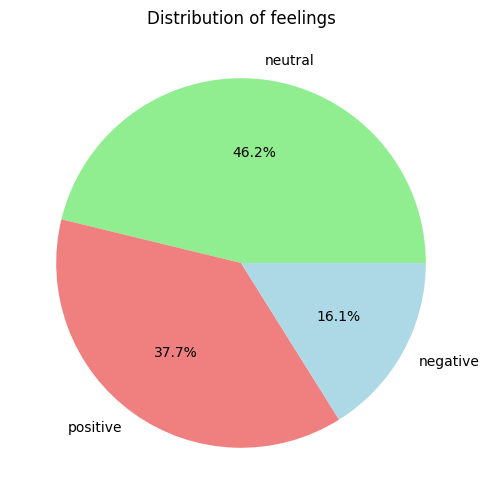

<ipython-input-25-25effd30a1c3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


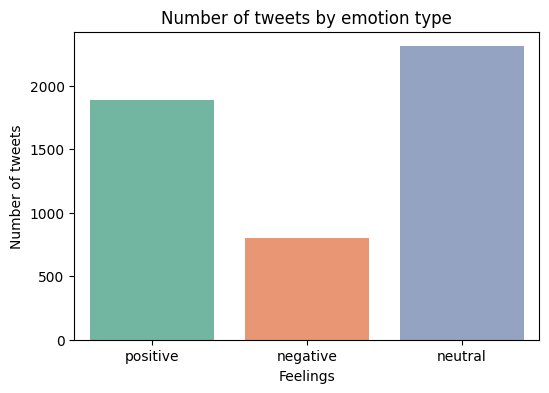

In [ ]:
# Pie Chart
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6,6))
sentiment_counts.plot.pie(autopct='%1.1f%%', colors=['lightgreen','lightcoral','lightblue'])
plt.title('Distribution of feelings')
plt.ylabel('')
plt.show()

# Count Plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title('Number of tweets by emotion type')
plt.xlabel('Feelings')
plt.ylabel('Number of tweets')
plt.show()


## Step 2: Most Active Users
## Who tweets the most about AI?

<ipython-input-26-9db1ac952641>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.values, y=top_users.index, palette='magma')


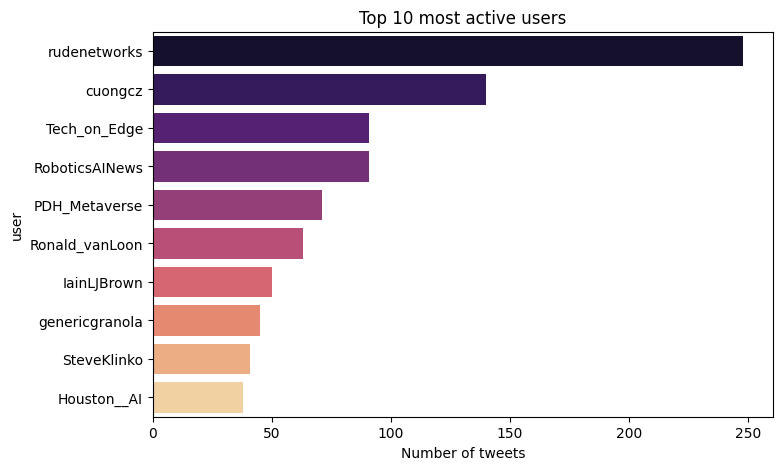

In [ ]:
top_users = df['username'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_users.values, y=top_users.index, palette='magma')
plt.title('Top 10 most active users')
plt.xlabel('Number of tweets')
plt.ylabel('user')
plt.show()


## Step 3: Analyze likes by sentiment type



<ipython-input-28-6838b94cf20e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sentiment', y='likes', palette='Set3')


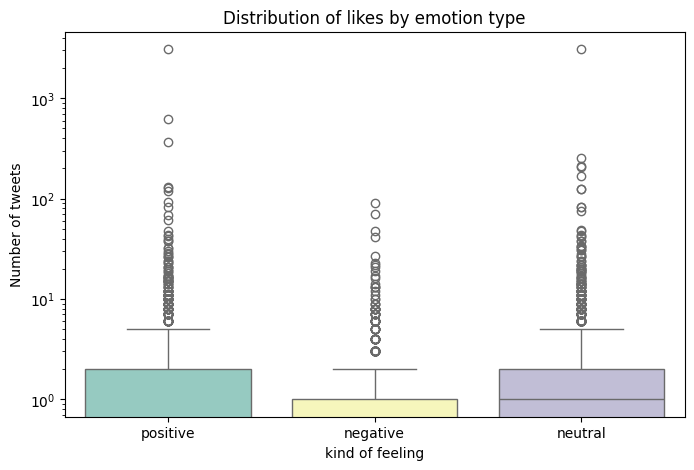

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='sentiment', y='likes', palette='Set3')
plt.title('Distribution of likes by emotion type')
plt.xlabel('kind of feeling')
plt.ylabel('Number of tweets')
plt.yscale('log')  # If there were very large values
plt.show()


## Step 4: Create a Word Cloud
It is helpful to create a word cloud for each emotion type.

Word cloud before cleaning

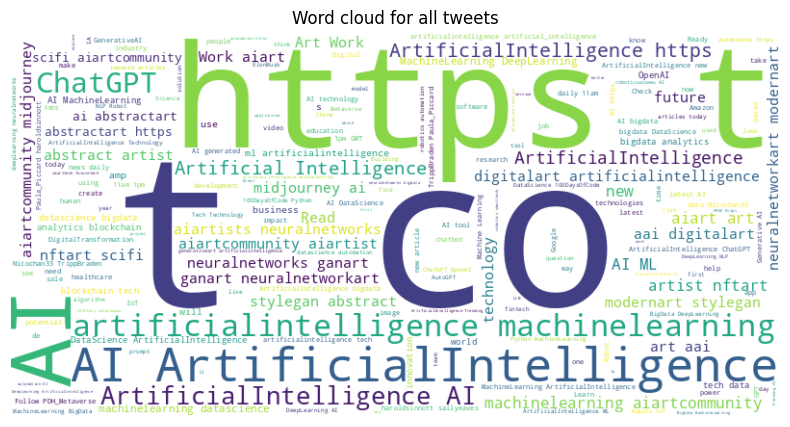

In [ ]:
# لكل المشاعر
text = ' '.join(df['tweets'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud for all tweets')
plt.show()


Size = Number of occurrences
Larger words mean they appear more often in text.

For example, the word https is the largest, meaning it appears frequently in tweets (usually because it's a link).

Words like Artificial, Intelligence, AI, ChatGPT, DataScience, and MachineLearning also appear frequently.



## Word cloud after cleaning

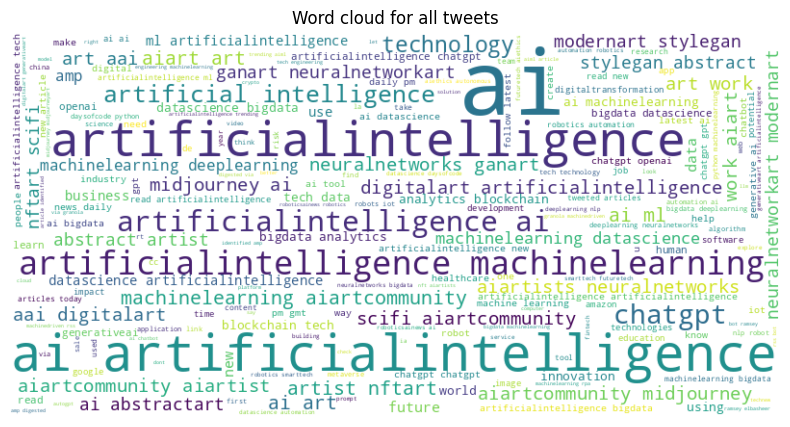

In [ ]:
# لكل المشاعر
text = ' '.join(df['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud for all tweets')
plt.show()


### For each feeling separately:

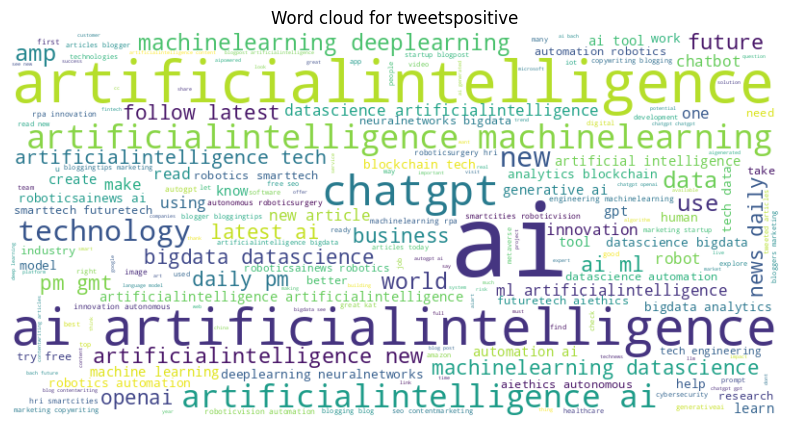

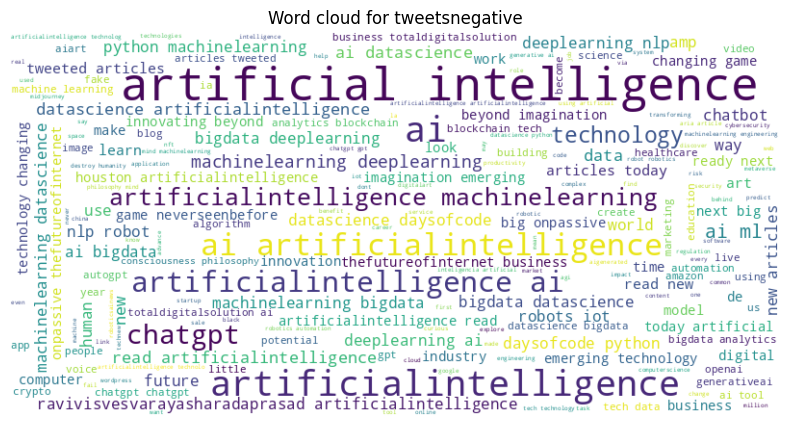

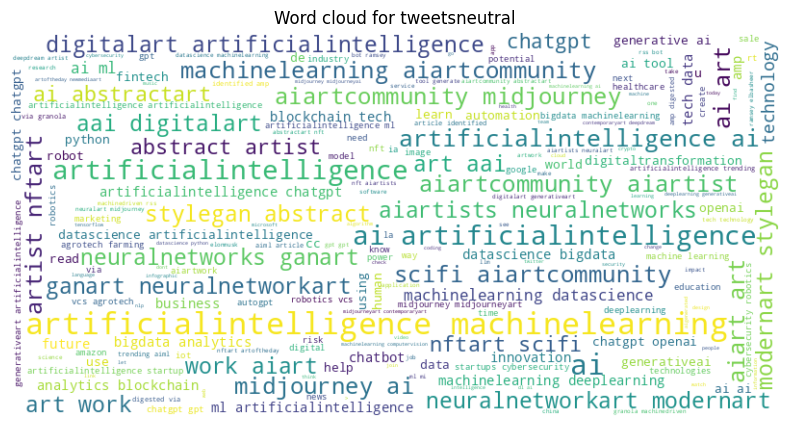

In [ ]:
for sentiment in df['sentiment'].unique():
    text = ' '.join(df[df['sentiment'] == sentiment]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word cloud for tweets{sentiment}')
    plt.show()


Explanation: Tweets that contributed to the negative cloud
Doesn't mean the words themselves are negative, but rather that these words appeared in a negative context.

For example, a tweet might say "ChatGPT isn't working today"—this is negative, even though the word "ChatGPT" itself isn't.

Or, "AI is taking over jobs"—it contains the word "AI," but the overall mood is negative.

# **5. Analyzing the time trends of emotions**

In any project related to public opinion or user sentiment on social media, identifying the days with the highest levels of sentiment is crucial to understanding:

What happened on that day? (e.g., a product launch, a shocking news story, an official statement, etc.)

How did the audience react?

Were they optimistic or angry? And why?

Conclusions we can draw:
1. The day with the highest number of positive tweets:
 This means that there was an event or content that excited people.

Examples:

The launch of a new ChatGPT or Google AI feature.

Positive news in the field of artificial intelligence.

Announcement of a technological achievement.

This is a very important step because it shows how people's feelings about AI change over time.



In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['date_only'] = df['date'].dt.date

# Number of tweets per day
tweets_per_day = df.groupby(df['date_only']).size()

plt.figure(figsize=(12,5))
tweets_per_day.plot()
plt.title('Number of tweets over time')
plt.xlabel('the date')
plt.ylabel('Number of tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

# Step 1: Collect the number of tweets for each emotion each day


In [ ]:

sentiment_trend = df.groupby(['date_only', 'sentiment']).size().unstack().fillna(0)


# Step 2: Timeline drawing

<Figure size 1200x600 with 0 Axes>

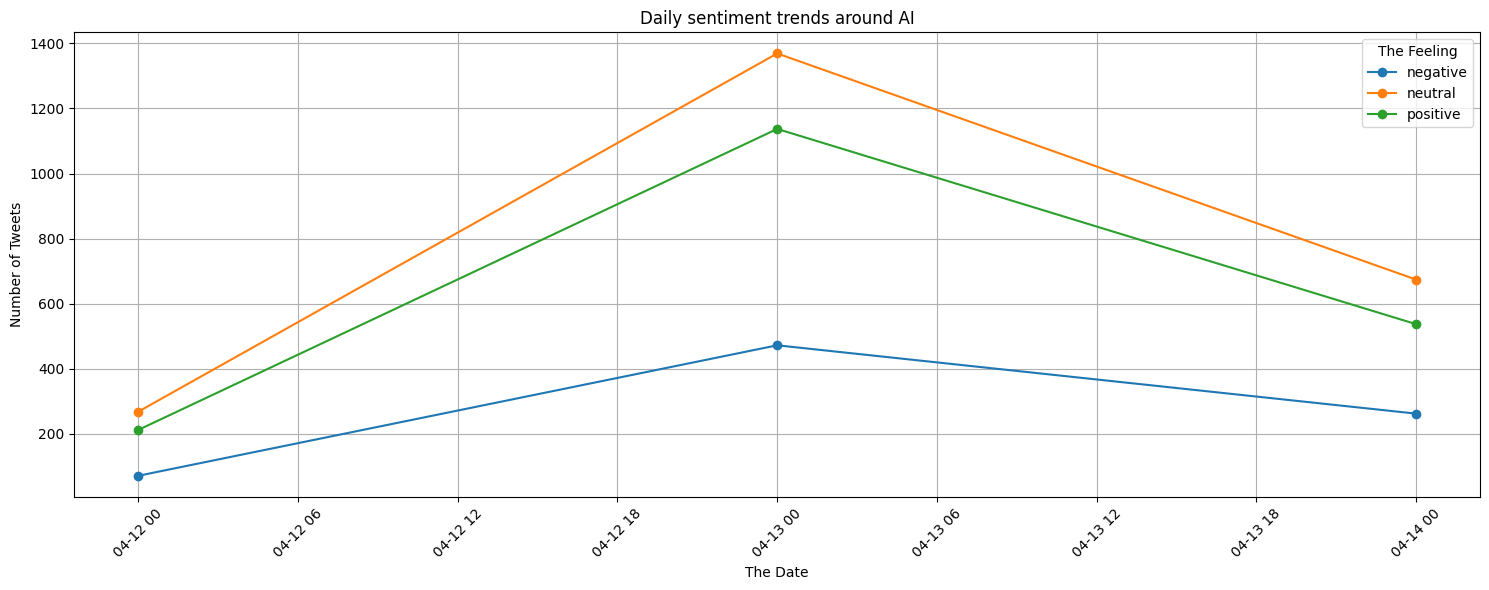

In [ ]:

plt.figure(figsize=(12, 6))

# Draw each feeling with a different line
sentiment_trend.plot(kind='line', marker='o', figsize=(15,6))

# Shape settings
plt.title('Daily sentiment trends around AI')
plt.xlabel('The Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='The Feeling')
plt.tight_layout()

plt.show()


## We see in the graph
Sudden increases in positive or negative feelings on certain days → We can later investigate the cause.

Declines → This may indicate a lack of activity or a decline in interest.


A significant spike on April 13:

All sentiments (positive, negative, and neutral) peaked on this date, which may indicate a significant event or widespread discussion about artificial intelligence on that day.

The highest number of tweets was for neutral sentiment, followed by positive, then negative.

General trend:

After the peak, there is a gradual decline in the number of tweets of all types.

This may indicate a gradual decline in engagement or interest.


_________________________________________

# **Final Report: Social Media Sentiment Analysis Project on Artificial Intelligence**

Introduction

The goal of this project is to analyze Twitter users' sentiments regarding artificial intelligence (AI). This is achieved by analyzing tweet data and extracting sentiments (positive, negative, neutral), displaying time trends, and common keywords.

1. Exploration Data Analysis (EDA)

The dataset includes 5,002 tweets.

Main column: tweets

The data covers different dates, and the average sentiment is divided into three categories: negative, positive, and neutral.

2. Text Cleaning and Preprocessing

Links, punctuation, symbols, and numbers were removed.

Captured lowercase letters.

Tokenization and stopword removal were used.

3. Sentiment Analysis

Tweets were classified into three categories: positive, negative, and neutral.

TextBlob was used to extract sentiment.

4. Visualization

WordCloud is visualized for each sentiment category.

A line chart shows the time trend for each sentiment type.

5. Temporal Trends

April 13th saw the highest number of positive tweets.

We also observed a significant increase in negative content on April 14th.

Final Conclusions

The public is mostly positive about AI.

There is a focus on topics such as ChatGPT, Machine Learning, and NLP.

We can deepen the analysis by using more accurate classification models (such as BERT).